In [22]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt



#Figure size for the graphs
sns.set(rc={'figure.figsize':(14,14)})
#Text in the graphs were overlapping.


# Reading our data

df = pd.read_csv(r'C:\Users\Lucas\Desktop\Data Analyst Stuff\Building The portfoilo\PYTHON Portfolio\TheOfficeIMDBPerEpisode.csv')


In [2]:
# Taking a look into our data

df.head()

,Season,Title,AirDate,Rating,Num_Votes,Description,DirectedBy,WrittenBy
0,1,Pilot,2005-03-24,7.5,4349,The premiere episode introduces the boss and s...,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,Diversity Day,2005-03-29,8.3,4213,Michael's off color remark puts a sensitivity ...,Ken Kwapis,B. J. Novak
2,1,Health Care,2005-04-05,7.8,3536,Michael leaves Dwight in charge of picking the...,Ken Whittingham,Paul Lieberstein
3,1,The Alliance,2005-04-12,8.1,3428,"Just for a laugh, Jim agrees to an alliance wi...",Bryan Gordon,Michael Schur
4,1,Basketball,2005-04-19,8.4,3745,Michael and his staff challenge the warehouse ...,Greg Daniels,Greg Daniels


In [3]:
# Let's delete date we will not be using 

del df['WrittenBy']
del df['Description']
del df['AirDate']

In [4]:
# Let's Check our new table
df.head()

,Season,Title,Rating,Num_Votes,DirectedBy
0,1,Pilot,7.5,4349,Ken Kwapis
1,1,Diversity Day,8.3,4213,Ken Kwapis
2,1,Health Care,7.8,3536,Ken Whittingham
3,1,The Alliance,8.1,3428,Bryan Gordon
4,1,Basketball,8.4,3745,Greg Daniels


In [5]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      188 non-null    int64  
 1   Title       188 non-null    object 
 2   Rating      188 non-null    float64
 3   Num_Votes   188 non-null    int64  
 4   DirectedBy  188 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 7.5+ KB


In [6]:
# Checking for data that may be missing

for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}% '.format(col, missing))

Season - 0.0% 
Title - 0.0% 
Rating - 0.0% 
Num_Votes - 0.0% 
DirectedBy - 0.0% 


In [7]:
# First we will fidn the average rating by season and visualize it 

# Creating a variable to simplify this process
season_avg = df.groupby('Season').Rating.mean().to_frame().reset_index()

#Printing it to see if it came out correctly
print(season_avg)

   Season    Rating
0       1  7.983333
1       2  8.450000
2       3  8.600000
3       4  8.564286
4       5  8.496154
5       6  8.203846
6       7  8.320833
7       8  7.629167
8       9  7.921739


(0.0, 10.0)

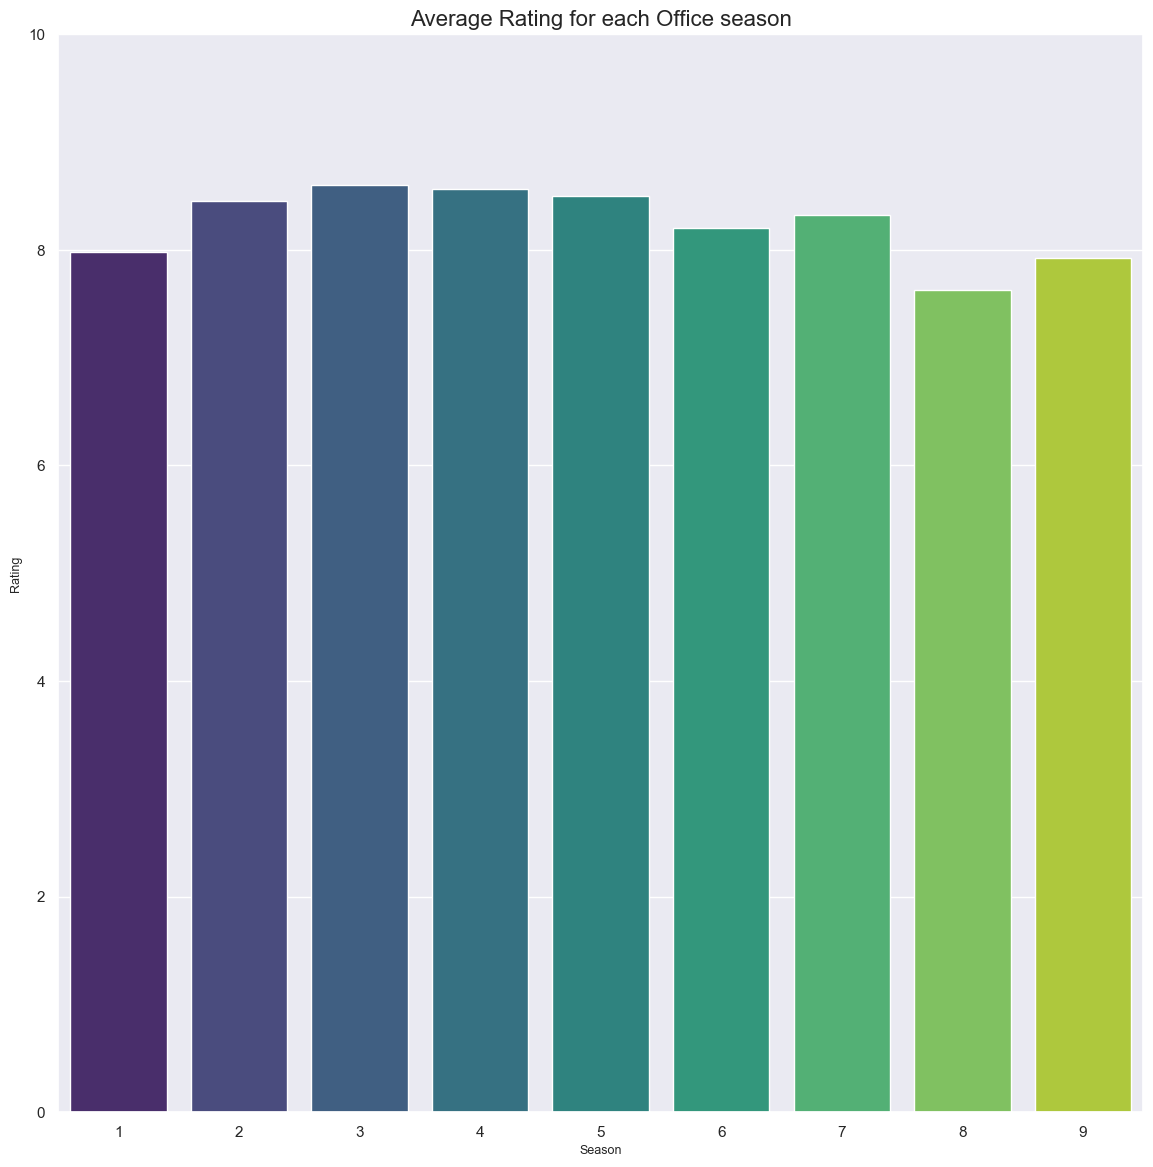

In [23]:
# Now Let's visualize it 

seasonGraph = sns.barplot(x=season_avg.Season, y=season_avg.Rating, palette='viridis')


# Our Labels and ranges for our barplot
seasonGraph.axes.set_title("Average Rating for each Office season",fontsize=16)
seasonGraph.set_xlabel("Season",fontsize=9)
seasonGraph.set_ylabel("Rating",fontsize=9)
seasonGraph.set_ylim(0, 10)

In [11]:
# Next let's find out which director directed the most episode

director2 = df.groupby(['DirectedBy'])['DirectedBy'].count()

directCount = director2.nlargest(5)
print(directCount)
# We can see Paul Feig and Randall Einhorn directed the most episodes

DirectedBy
Paul Feig          15
Randall Einhorn    15
Greg Daniels       13
Ken Kwapis         13
Jeffrey Blitz      11
Name: DirectedBy, dtype: int64


(0.0, 15.0)

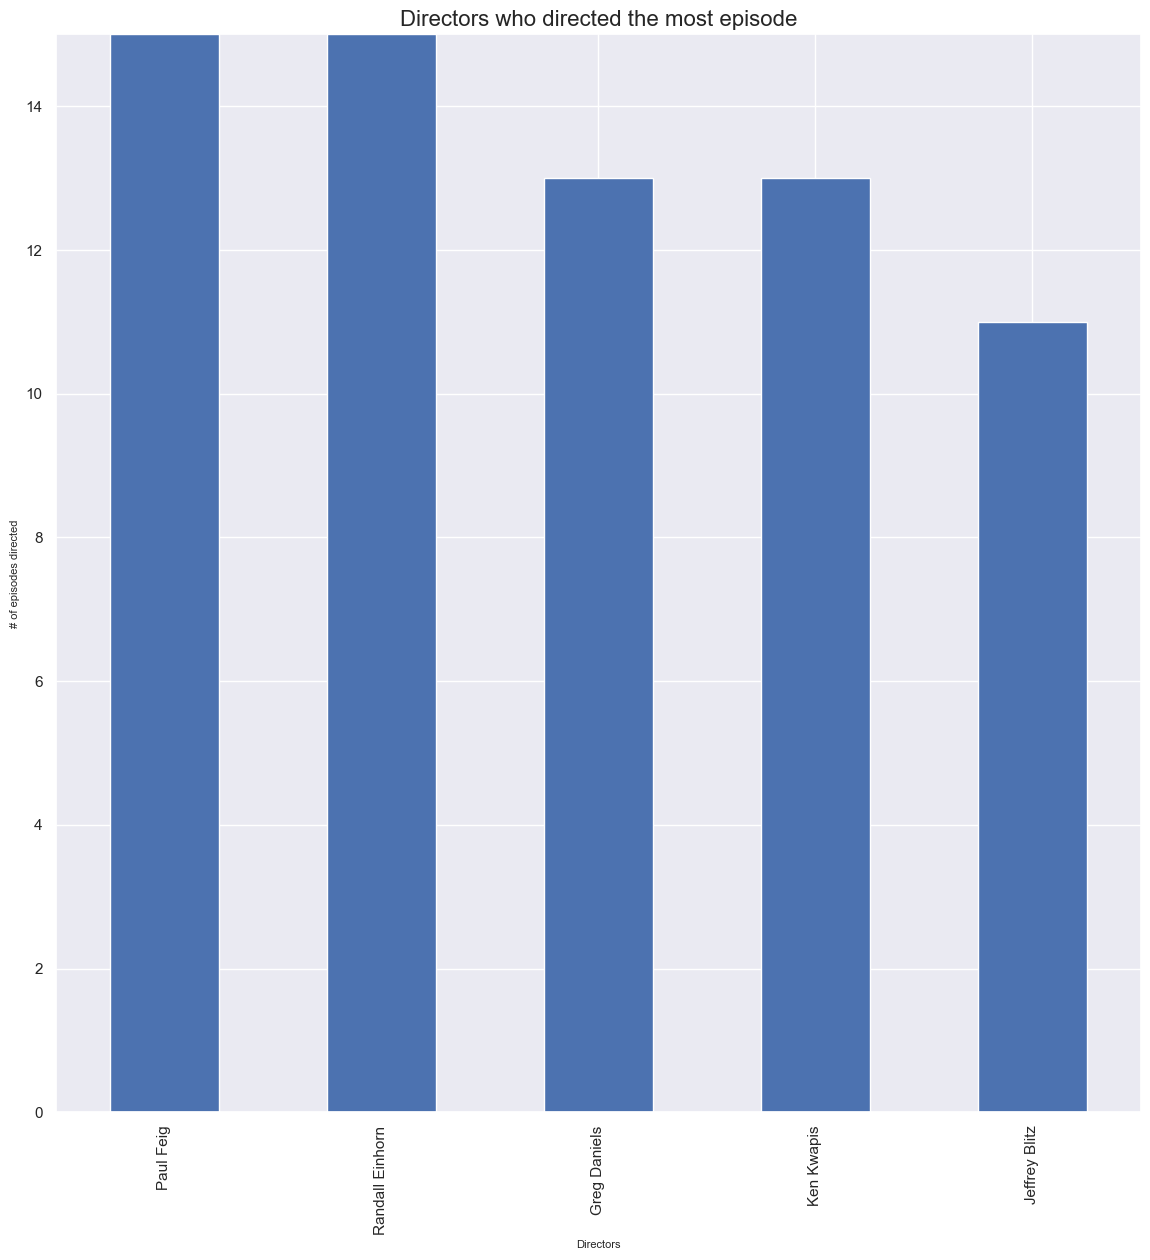

In [26]:
# Graphing the directors 

directGraph = directCount.plot(kind = 'bar')

# Creating our labels and range for our graph
directGraph.axes.set_title("Directors who directed the most episode",fontsize=16)
directGraph.set_xlabel("Directors",fontsize=8)
directGraph.set_ylabel("# of episodes directed",fontsize=8)
directGraph.set_ylim(0, 15)


In [16]:
# Next we are going to find out the highest rated episodes

# Creating a variable that displays the highest rated episodes
highepisode = df[['Title','Rating']].sort_values('Rating', ascending=False).head(5).reset_index(drop=True)
print(highepisode)

              Title  Rating
0            Finale     9.8
1  Goodbye, Michael     9.8
2     Stress Relief     9.7
3          A.A.R.M.     9.5
4      Casino Night     9.4


Text(0.5, 0, 'Episode')

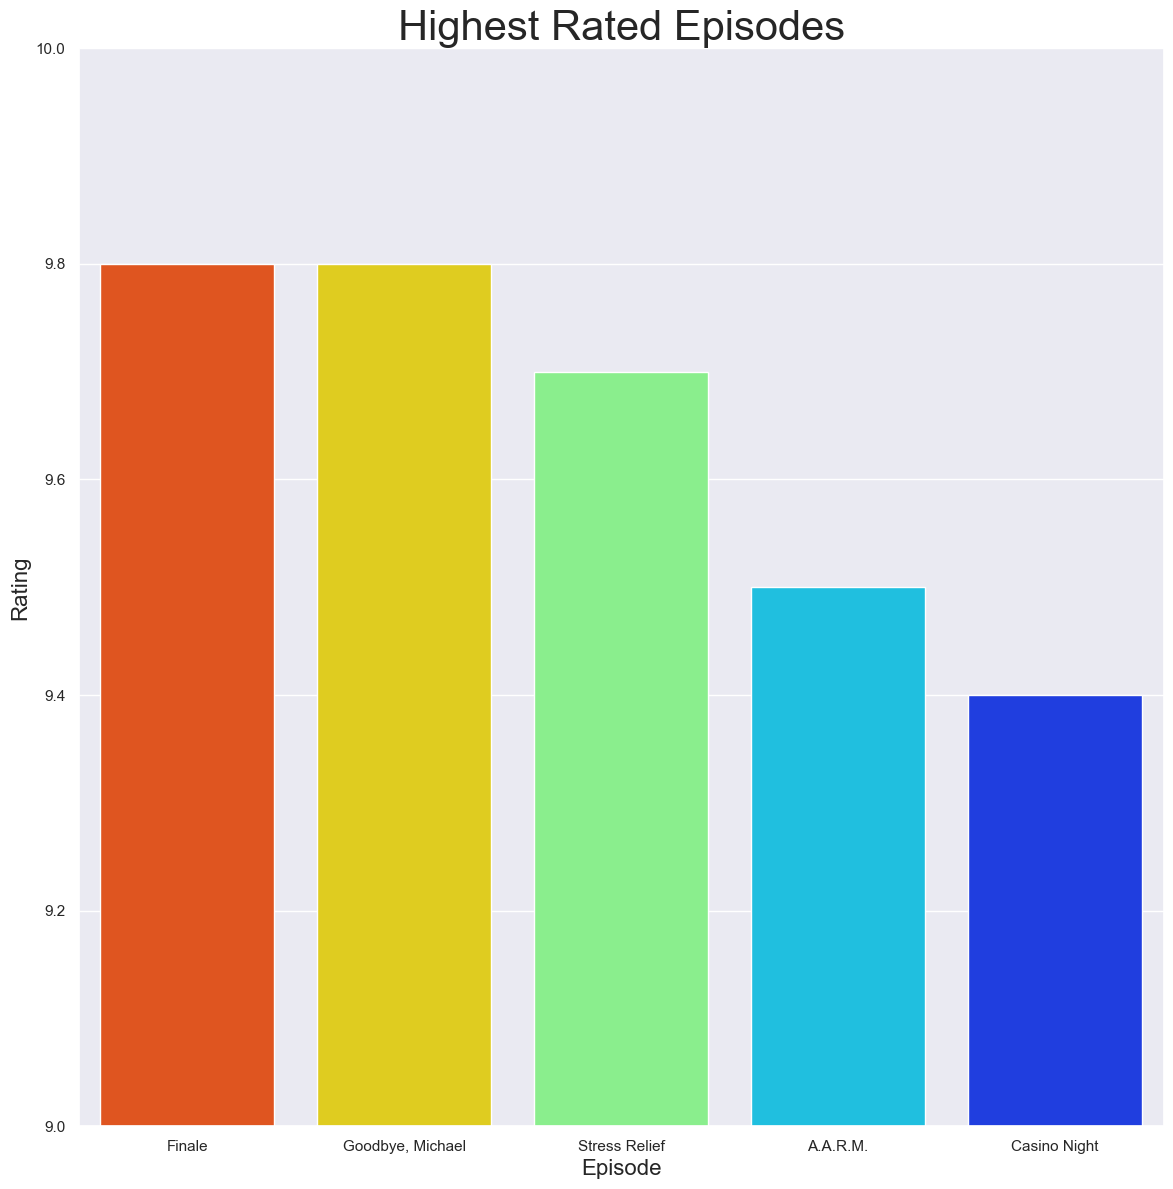

In [24]:
#Graphing our highest rated episode

HepiBar = sns.barplot(x=highepisode.Title, y=highepisode.Rating, palette='jet_r')


# Our labels and ranges
HepiBar.set_ylim(9.0, 10.0)
HepiBar.axes.set_title("Highest Rated Episodes",fontsize=30)
HepiBar.set_ylabel("Rating",fontsize=16)
HepiBar.set_xlabel("Episode",fontsize=16)

In [18]:
# Finally we will look at the lowest rated episodes

# Creating our variable which is the same as our previous one that we made, except we will have it sort in reverse
lowepisode = df[['Title','Rating']].sort_values('Rating', ascending=True).head(5).reset_index(drop=True)
print(lowepisode)

               Title  Rating
0       Get the Girl     6.6
1         The Banker     6.8
2         Gettysburg     6.9
3  Here Comes Treble     7.0
4      Welcome Party     7.1


Text(0, 0.5, 'Rating')

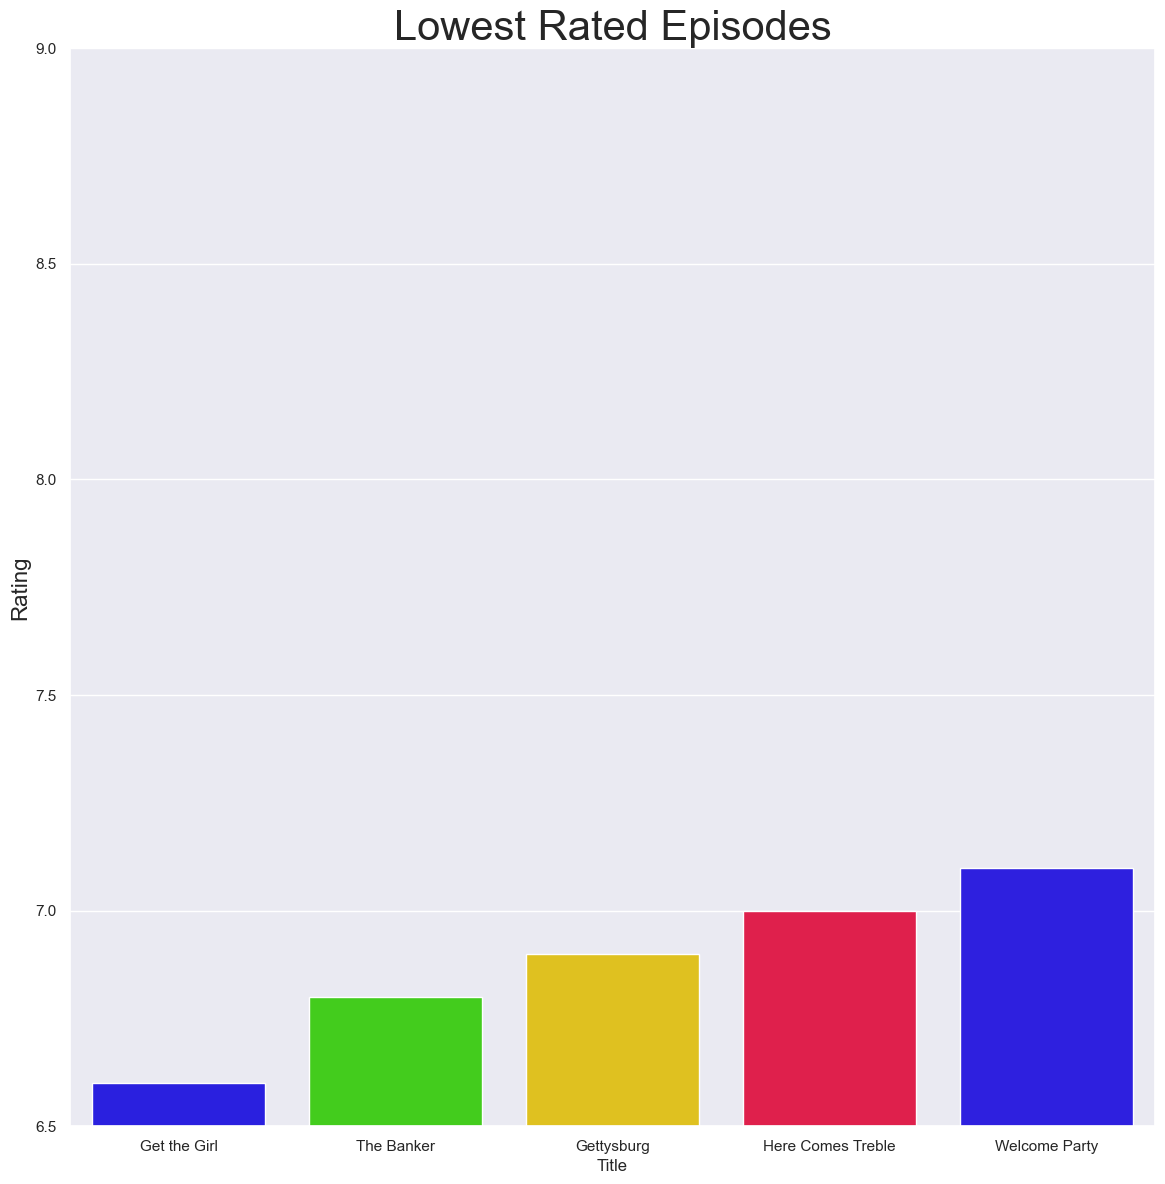

In [28]:

# Creating our Variable
lowepisode = df[['Title','Rating']].sort_values('Rating', ascending=True).head(5).reset_index(drop=True)

# Our Table
lowepisode = sns.barplot(x=lowepisode.Title, y=lowepisode.Rating, palette='prism')

# Our ranges and labels
lowepisode.set_ylim(6.5, 9.0)
lowepisode.axes.set_title("Lowest Rated Episodes",fontsize=30)
lowepisode.set_ylabel("Rating",fontsize=16)